# Analyzing World Happiness 
###     Exploring the correlations between GDP and life expectancy on happiness

In the dataset composed from the Gallup World Poll and compiled by the Sustainable Developmentment Solutions Network (eventually endorsed by the United Nations in 2017), the World Happiness Report (https://www.kaggle.com/unsdsn/world-happiness/home) provides data on over 150 countries ranking them by their self-prescribed happiness levels along with six factors that contribute to their happiness: economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

Focusing specifically on the quanitifiable measurements of economic production and life expectancy, I was interested to see how the *development* of these two factors contributed to the rankings of happiness. Therefore, using two supplemental datasets that recorded the GDP (https://www.kaggle.com/ibrahimmukherjee/gdp-world-bank-data/home) and life expectancy (https://data.worldbank.org/indicator/SP.DYN.LE00.IN) of countries, I explored the 40 years preceding the release of the 2015 World Happiness Report (ranging from 1975-2015). The reason for this limiting of years is twofold: the first is practical in that there was considerably more data missing before the year 1975 which would limit the overall observations.

The second reason for my limiting of the years - and the motivation of my interest in the subject - is the assumption that happiness is based on relative growth, knowing your current position in light of where you once were. In other words, the GDP and life expectancy, when viewed in isolation from other years, tells a weaker narrative than the development of a country across the years. Happiness is positive perspective, and positive perspective generally is that which has seen growth over the years. Therefore, since GDP and life expectancy are easily quantifiable, my report will focus on the analysis of this data. 

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import math

In [163]:
data_folder = 'C:\\Users\\paulb\\OneDrive\\Desktop\\Data Science\\Data Sets\\World Happiness Report\\'
df_2015 = pd.read_csv(data_folder+'2015.csv')
GDP = pd.read_excel(data_folder+'Country_GDP.xlsx')
life_expectancy = pd.read_excel(data_folder+'Life_Expectancy.xlsx')
df_2015.rename(columns={'Happiness Rank':'Rank', 'Happiness Score':'Score', 'Standard Error':'SE', 'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'LifeExp', 'Trust (Government Corruption)':'Corruption', 'Dystopia Residual':'Dystopia'}, inplace=True)


GDP = GDP.drop(columns=[str(year) for year in range(1960, 1975)])
life_expectancy = life_expectancy.drop(columns=[year for year in range(1960,1975)])
life_expectancy = life_expectancy.drop(columns=[year for year in range(2016,2018)])

To show the data with which we're working, seen below is head of the Happiness dataset from 2015, showing the top 5 happiest countries.

In [164]:
df_2015.head()

,Country,Region,Rank,Score,SE,Economy,Family,LifeExp,Freedom,Corruption,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


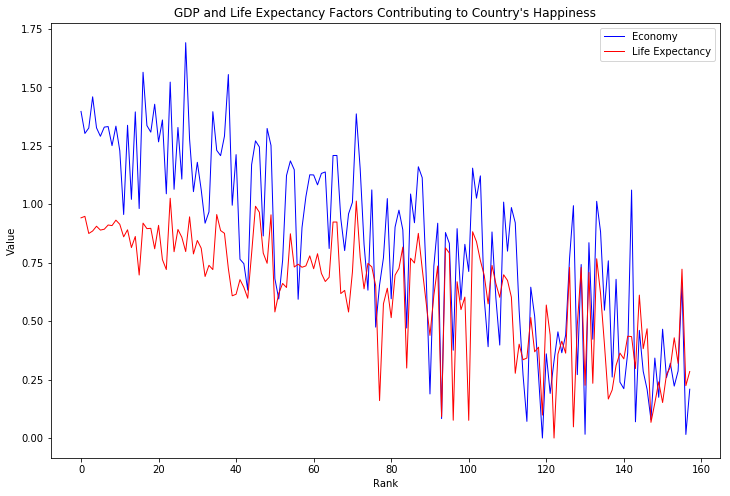

In [165]:
plt.figure(figsize=(12,8))
plt.plot(df_2015['Economy'], label='Economy', color='b', linewidth=1, alpha=1)
plt.plot(df_2015['LifeExp'], label='Life Expectancy', color='r', linewidth=1, alpha=1)
plt.xlabel('Rank')
plt.ylabel('Value')
plt.legend()
plt.title('GDP and Life Expectancy Factors Contributing to Country\'s Happiness')
plt.show()

While the lineplot above appears to make a case for a general correlation between GDP and life expectancy on happiness, the data set doesn't explain exactly how the values were derived. In a description of the dataset, the author writes, "The columns following the happiness score estimate the extent to which each of six factors [...] contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors."

Therefore, since there seems to be a high potential for inaccurate and unnecessary data manipulation with these values and since this report is more interested in development of the factors, we will be using the two additional data sets referenced above to make our own conclusions.

In [166]:
happiest_countries_2015 = df_2015[df_2015['Rank'] < 11]
saddest_countries_2015 = df_2015[df_2015['Rank'] > 147]

In [167]:
happiest_plot_frame = GDP[GDP['Country Name'].isin(happiest_countries_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
saddest_plot_frame = GDP[GDP['Country Name'].isin(saddest_countries_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')

In [168]:
def plot_gpd(df, country):
    '''This plots the GDP of the country/countries specified.'''
    df.T.plot(kind='line', figsize=(12,5))
    plt.xlabel('Years')
    plt.ylabel('GDP')
    plt.xticks([i for i in range(0, 41, 5)], [str(year) for year in range(1975, 2016, 5)])
    plt.title('GDP for {}'.format(country))
    plt.tight_layout()
    plt.show()

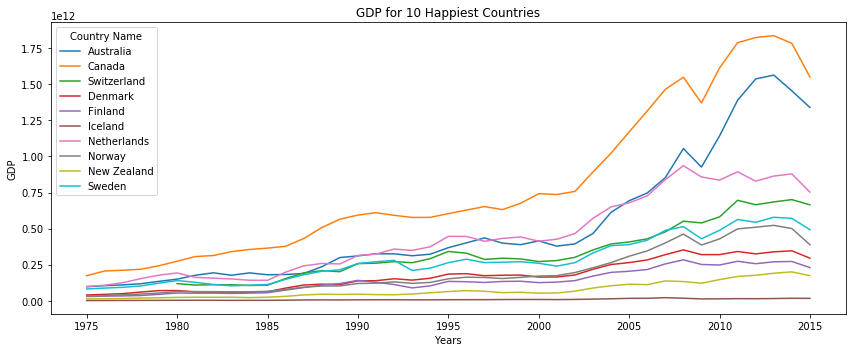

In [169]:
plot_gpd(happiest_plot_frame, "10 Happiest Countries")

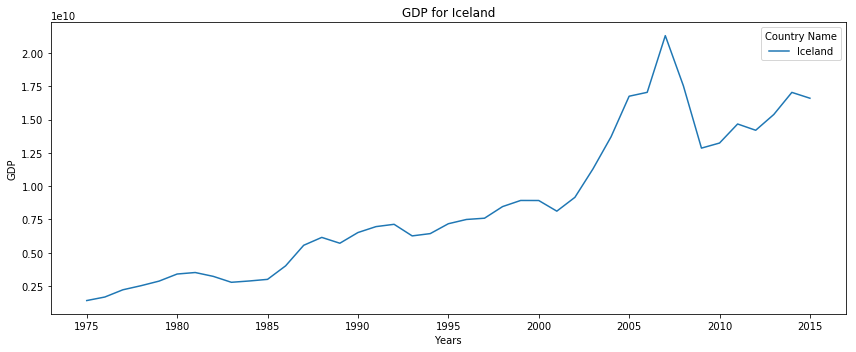

In [170]:
plot_gpd(happiest_plot_frame[happiest_plot_frame.index == 'Iceland'], "Iceland")

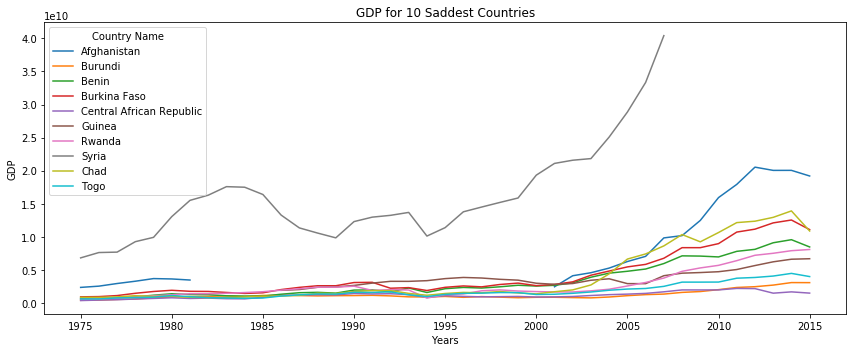

In [171]:
plot_gpd(saddest_plot_frame, "10 Saddest Countries")

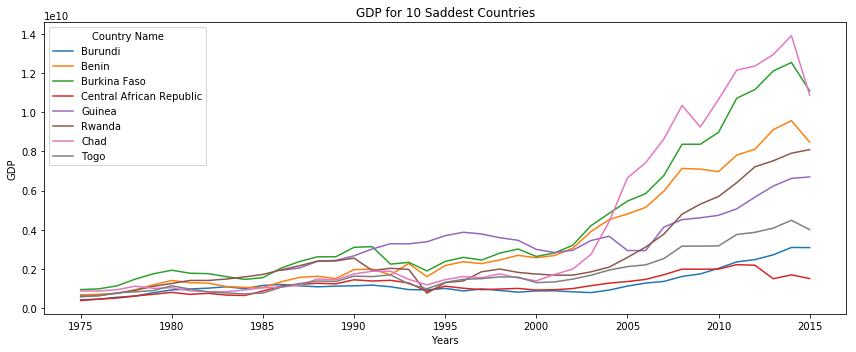

In [172]:
saddest_exceptions = saddest_plot_frame.drop(['Syria', 'Afghanistan'])
plot_gpd(saddest_exceptions, "10 Saddest Countries")

A quick analysis of the happiest and saddest countries provides us with a few insights. Observing the happiest countries, we see the range of wealth is considerably varied (especially when Iceland is compared to Canada). Moreover, observing the saddest countries, we see that Afghanistan stands as an example of how we aren't dealing with perfectly complete data. Lastly, we see a hint of more aggressive GDP fluctuation in the saddest countries.

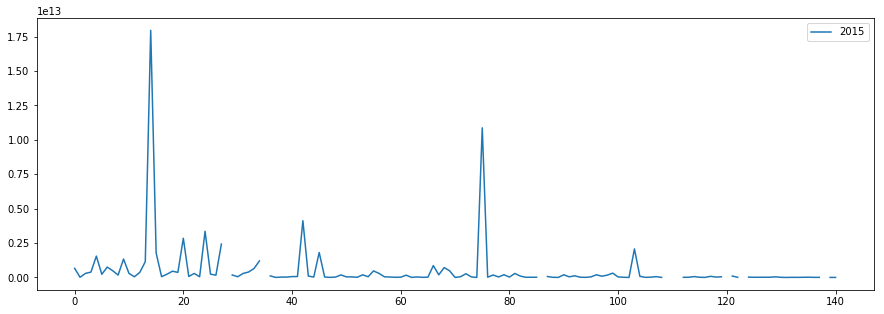

,2015
Country Name,
United States,1.794700e+13


In [240]:
all_plot_frame = GDP[GDP['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
gdp_2015 = pd.DataFrame(all_plot_frame.loc[:, '2015'])
rankings = pd.DataFrame(df_2015['Country'])
ranked_gdp_2015 = pd.merge(left=rankings, right=gdp_2015, left_on=['Country'], right_on=[gdp_2015.index])
ranked_gdp_2015 = ranked_gdp_2015.drop('Country', axis=1)
ranked_gdp_2015.plot(figsize=(15,5))
plt.show()
gdp_2015.loc[gdp_2015['2015'] == gdp_2015['2015'].max()]

It's worth mentioning that upon doing a simple plot of the GDP in 2015, the happier countries are, for the most part, wealthier than the sadder countries. The plot shows considerable outliers in the GDP spread - chief among them being the United States.

In [241]:
gdp_plot_frame = GDP[GDP['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code']).set_index('Country Name')
le_plot_frame = life_expectancy[life_expectancy['Country Name'].isin(df_2015['Country'])].drop(columns=['Country Code', 'Indicator Name', 'Indicator Code']).set_index('Country Name')

In [242]:
def country_growth(df, country):
    '''This function finds the percentage growth between adjacent years for a single country. Output is array.
        - Input: df --- a DataFrame
                    country --- a string (row name of DataFrame)'''
    row = df.loc[country]
    collect = []
    for i in range(1,41):
        growth = row.iloc[i]/row.iloc[i-1]
        collect.append(growth)
    return collect

In [243]:
def all_growth(df):
    '''This function finds the percentage growth between adjacent years for all countries in specified DataFrame.
        - Input: df --- a DataFrame'''
    countries = df.index.tolist()
    collect = [[]]
    for country in countries:
        collect.append(country_growth(df, country))
    del collect[0]
    df = pd.DataFrame(collect, index=countries)
    df[np.isnan(df)]=1
    return df

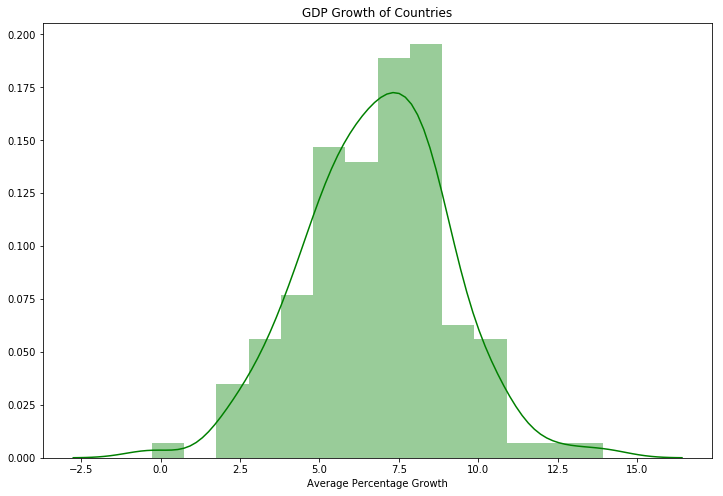

In [244]:
gdp_growth = all_growth(gdp_plot_frame)
gdp_growth_mean = ((gdp_growth.T.mean())*100)-100

plt.subplots(figsize=(12,8))
sns.distplot(gdp_growth_mean, color='g', axlabel='Average Percentage Growth').set_title('GDP Growth of Countries')
plt.show()

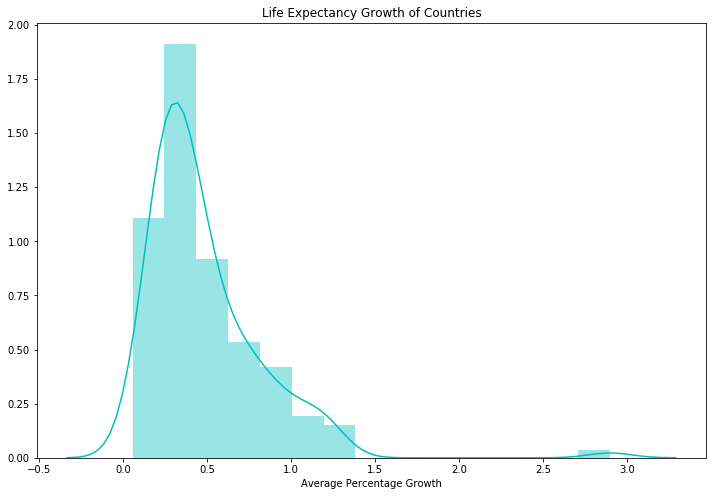

In [245]:
le_growth = all_growth(le_plot_frame)
le_growth_mean = ((le_growth.T.mean())*100)-100
plt.subplots(figsize=(12,8))
sns.distplot(le_growth_mean,bins=15, color='c', axlabel='Average Percentage Growth').set_title('Life Expectancy Growth of Countries')
plt.show()

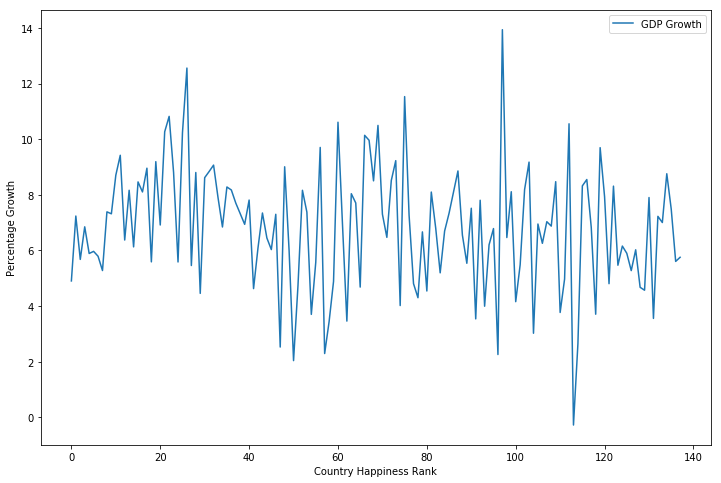

In [246]:
#Merging Rankings data with respective GDP Growth data and Life Expectancy Data
gdp_mean = pd.DataFrame(gdp_growth_mean)
le_mean = pd.DataFrame(le_growth_mean)
ranked_gdp_growth = pd.merge(left=rankings, right=gdp_mean, left_on=['Country'], right_on=[gdp_mean.index])
ranked_country_growth = pd.merge(left=ranked_gdp_growth, right=le_mean, left_on='Country', right_on=[le_mean.index])

ranked_country_growth.set_index(np.array(list(range(1,139))))
ranked_country_growth.columns = ['Country', 'GDP Growth', 'Life Growth']

ranked_country_growth.plot(y='GDP Growth', figsize=[12,8])
plt.xlabel('Country Happiness Rank')
plt.ylabel('Percentage Growth')
plt.show()

1. Research Question: How does the percentage increase of GDP over 40 years affect the happiness of a country?
2. Research Question: How does the percentage increase of life expectancy over 40 years affect the happiness of a country?
3. Research Question: How does the average growth of GDP and life expectancy affect the happiness of a country?

In [247]:
#Finding highest GDP growth country
ranked_normal_growth.loc[ranked_normal_growth['GDP Growth'] == ranked_normal_growth['GDP Growth'].max()]

,Country,GDP Growth,Life Growth,Average
97,Iraq,0.501191,-0.053545,0.223823


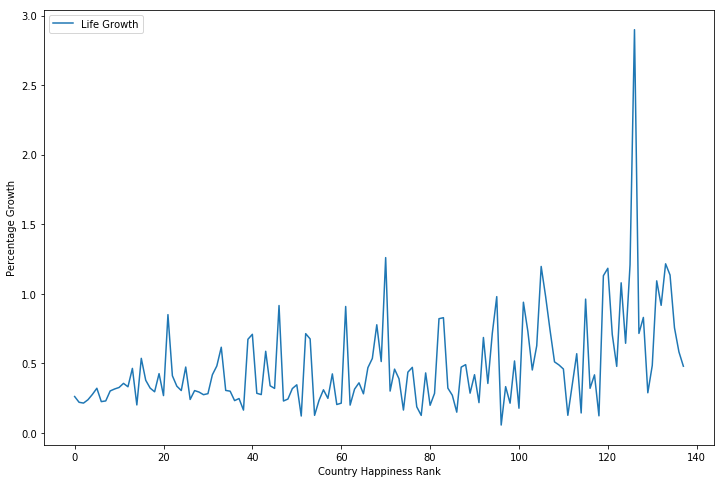

In [248]:
ranked_country_growth.plot(y='Life Growth', figsize=[12,8])
plt.xlabel('Country Happiness Rank')
plt.ylabel('Percentage Growth')
plt.show()

In [249]:
#Finding highest life expectancy growth country
ranked_normal_growth.loc[ranked_normal_growth['Life Growth'] == ranked_normal_growth['Life Growth'].max()]

,Country,GDP Growth,Life Growth,Average
126,Cambodia,-0.1082,0.849366,0.370583


In [250]:
#Exploring this outlier
print(le_growth_mean.loc[le_growth_mean == le_growth_mean.max()])
print('\n')
print(le_plot_frame.loc['Cambodia'].head())
print(le_plot_frame.loc['Cambodia'].tail())

Cambodia    2.898391
dtype: float64


1975    23.595
1976    20.317
1977    18.907
1978    19.725
1979    22.744
Name: Cambodia, dtype: float64
2011    67.034
2012    67.466
2013    67.868
2014    68.251
2015    68.620
Name: Cambodia, dtype: float64


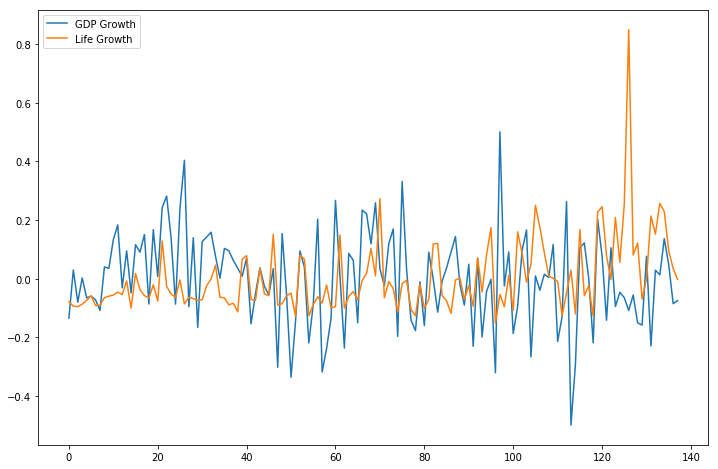

In [251]:
# Normalizing data for side-by-side plotting
normal_le = (le_mean-le_mean.mean())/(le_mean.max()-le_mean.min())

ranked_normal_gdp_growth = pd.merge(left=rankings, right=normal_gdp, left_on=['Country'], right_on=[normal_gdp.index])
ranked_normal_growth = pd.merge(left=ranked_normal_gdp_growth, right=normal_le, left_on='Country', right_on=[normal_le.index])
ranked_normal_growth.set_index(np.array(list(range(1,139))))
ranked_normal_growth.columns = ['Country', 'GDP Growth', 'Life Growth']

plt.figure(figsize=(12,8))
plt.plot('GDP Growth', data=ranked_normal_growth)
plt.plot('Life Growth', data=ranked_normal_growth)
plt.legend()
plt.show()

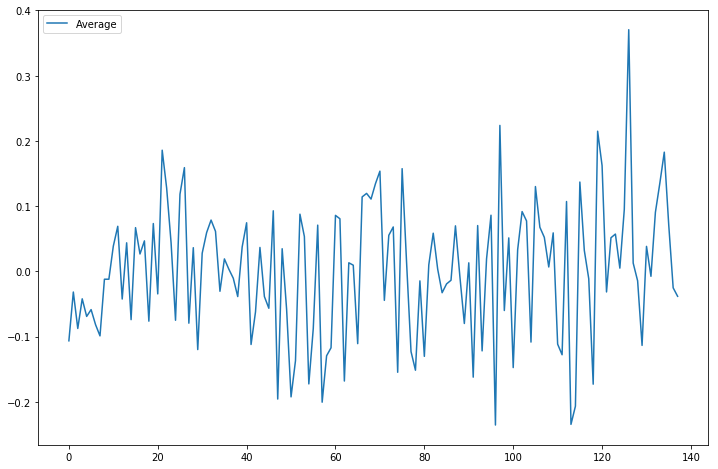

In [252]:
ranked_normal_growth['Average'] = (ranked_normal_growth['GDP Growth']+ranked_normal_growth['Life Growth'])/2

plt.figure(figsize=(12,8))
plt.plot('Average', data=ranked_normal_growth)
plt.legend()
plt.show()

In [253]:
#Finding country with highest normalized average
ranked_normal_growth.loc[ranked_normal_growth['Average'] == ranked_normal_growth['Average'].max()]

,Country,GDP Growth,Life Growth,Average
126,Cambodia,-0.1082,0.849366,0.370583


In [254]:
ranked_normal_growth.describe()

,GDP Growth,Life Growth,Average
count,138.000000,138.000000,138.000000
mean,0.000877,0.000000,0.000439
std,0.157623,0.123211,0.104064
min,-0.498809,-0.150634,-0.235540
25%,-0.094347,-0.073814,-0.074675
50%,0.008010,-0.044522,0.009750
75%,0.101744,0.048989,0.069673
max,0.501191,0.849366,0.370583


In [255]:
slow_gdp = ranked_normal_growth[ranked_normal_growth['GDP Growth'] < -0.094347]
fast_gdp = ranked_normal_growth[ranked_normal_growth['GDP Growth'] > 0.101744]
print('Average happiness rank of top 25% according to GDP growth is: ' + str(sum(fast_gdp['Country'].index)/len(fast_gdp['Country'].index)) + ' of 138 countries')
print('Average happiness rank of bottom 25% according to GDP growth is: ' + str(sum(slow_gdp['Country'].index)/len(slow_gdp['Country'].index)) + ' of 138 countries')

Average happiness rank of top 25% according to GDP growth is: 60.371428571428574 of 138 countries
Average happiness rank of bottom 25% according to GDP growth is: 80.2 of 138 countries


In [256]:
slow_le = ranked_normal_growth[ranked_normal_growth['Life Growth'] < -0.073814]
fast_le = ranked_normal_growth[ranked_normal_growth['Life Growth'] > 0.048989]
print('Average happiness rank of top 25% according to life expectancy growth is: ' + str(sum(fast_le['Country'].index)/len(fast_le['Country'].index)) + ' of 138 countries')
print('Average happiness rank of bottom 25% according to life expectancy growth is: ' + str(sum(slow_le['Country'].index)/len(slow_le['Country'].index)) + ' of 138 countries')

Average happiness rank of top 25% according to life expectancy growth is: 97.54285714285714 of 138 countries
Average happiness rank of bottom 25% according to life expectancy growth is: 54.857142857142854 of 138 countries


In [257]:
slow_average = ranked_normal_growth[ranked_normal_growth['Life Growth'] < -0.074675]
fast_average = ranked_normal_growth[ranked_normal_growth['Life Growth'] > 0.069673]
print('Average happiness rank of top 25% according to average growth is: ' + str(sum(fast_average['Country'].index)/len(fast_average['Country'].index)) + ' of 138 countries')
print('Average happiness rank of bottom 25% according to average growth is: ' + str(sum(slow_average['Country'].index)/len(slow_average['Country'].index)) + ' of 138 countries')

Average happiness rank of top 25% according to average growth is: 99.80645161290323 of 138 countries
Average happiness rank of bottom 25% according to average growth is: 55.61764705882353 of 138 countries
